In [1]:
val path = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
// note: use sbt assembly to create jar
interp.load.cp(os.Path(path))

import $ivy.`org.plotly-scala::plotly-almond:0.8.1`
import $ivy.`com.lihaoyi:ujson_2.13:1.3.8`
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`

import ujson.Value
import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")
import $ivy.`com.github.pathikrit::better-files:3.9.1`
import better.files._



path: String = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
import $ivy.$                                      

import $ivy.$                             
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`


import ujson.Value

import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")

import $ivy.$                                         

import better.files._



In [2]:
import scala.util.Random
import edu.colorado.plv.bounder.Driver
import edu.colorado.plv.bounder.RunConfig
import upickle.default.read
import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

import scala.util.Random

import edu.colorado.plv.bounder.Driver

import edu.colorado.plv.bounder.RunConfig

import upickle.default.read

import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}


import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._

In [3]:
import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode
import edu.colorado.plv.bounder.symbolicexecutor.state.DBPathNode
import edu.colorado.plv.bounder.ir._
def obsMessagesStr(nodes:List[DBPathNode]):List[DBPathNode] = {
nodes.flatMap{n =>
  n.qry.loc match {
    case c @ CallinMethodReturn(fmwClazz, fmwName) => Some(n)
    case c @ CallinMethodInvoke(fmwClazz, fmwName) => Some(n)
    case c @ GroupedCallinMethodInvoke(targetClasses, fmwName) => Some(n)
    case c @ GroupedCallinMethodReturn(targetClasses, fmwName) => Some(n)
    case c @ CallbackMethodInvoke(fmwClazz, fmwName, loc) => Some(n)
    case c @ CallbackMethodReturn(fmwClazz, fmwName, loc, line) => Some(n)
    case _ => None
  }}
}

val db = DBOutputMode("/Users/shawnmeier/Documents/source/bounder/soot_hopper/dbgpaths/connectbot2.db",true)

import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode

import edu.colorado.plv.bounder.symbolicexecutor.state.DBPathNode

import edu.colorado.plv.bounder.ir._

defined function obsMessagesStr
db: DBOutputMode = DBOutputMode(
  "/Users/shawnmeier/Documents/source/bounder/soot_hopper/dbgpaths/connectbot2.db",
  true
)

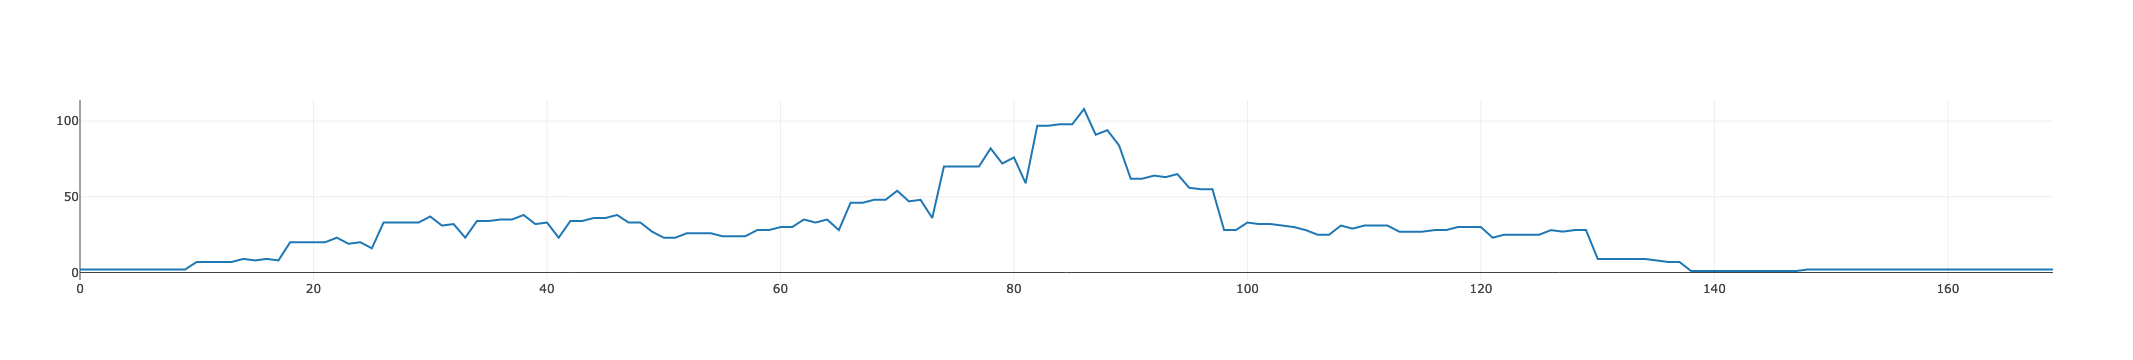

defined object LiveNodes
res3_1: String = "plot-2f1a9a34-b187-4dca-a2d6-d80bb0654a37"

In [4]:
object LiveNodes{ // Create object to supress output TODO: upgrade ammonite at some point
    val live = db.getAllLiveNodes()
    val (x,y) = live.groupBy(_.depth).map(a => (a._1, a._2.size)).toList.sortBy(_._1).unzip

// val (x, y) = Seq(
//   "Banana" -> 10,
//   "Apple" -> 8,
//   "Grapefruit" -> 5
// ).unzip
}
Scatter(LiveNodes.x, LiveNodes.y).plot()

In [5]:
LiveNodes.live.size

res4: Int = 4691

In [6]:
LiveNodes.live.groupBy(_.dbgTrace).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse

res5: List[(String, Int)] = List(
  (
    "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__10335), I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onResume, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))",
    140
  ),
  (
    "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__7361), I_CIExit_View_setOnClickListener, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))",
    140
  ),
  (
    "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__10332), I_CIExit_View_setOnClickListener, I_CBExit_Activity_onPause, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))",
    126
  ),
  (
    "Some(List(I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__7361), I_CIExit_View_set

In [7]:
LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__10335), I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onResume, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse.map(println)

(Some(List(df:s, df:this$0)),63)
(Some(List(df:s, df:this$0, df:v)),63)
(Some(List(df:this$0)),7)
(Some(List(df:this$0, df:v)),7)


res6: List[Unit] = List((), (), (), ())

In [27]:
object OUT32{
    import edu.colorado.plv.bounder.symbolicexecutor.state.State
    val dbgNodes = LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CIExit_Dialog_show, I_CIEnter_Dialog_dismiss))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size,a._2)).toList.sortBy(_._2).reverse
    val nodeList = OUT32.dbgNodes.head._3.toList
    def pp(s:State) = {
        val o = List("locals:","heap:","types:","trace:").foldLeft(s.toString){
            case (acc,v) => acc.replace(s"$v", s"\n$v")
        }
        println(o)
    }
    val stateList = nodeList.map(n => n.qry.getState.get)
    val stackGrouped = stateList.groupBy(_.sf.callStack.toString()).toList.sortBy(_._2.size).reverse
}
OUT32.stackGrouped.map(a => (a._1, a._2.size))
//OUT32.stateList.sortBy(s => s.sf.callStack.toString()).take(10).foreach{OUT32.pp}


defined object OUT32
res26_1: List[(String, Int)] = List(
  (
    "List([InternalMethodReturn(com.example.createdestroy.StatusActivity$PostTask,void <init>(com.example.createdestroy.StatusActivity),TestIRMethodLoc(com.example.createdestroy.StatusActivity$PostTask,void <init>(com.example.createdestroy.StatusActivity),List(Some(@this), Some(@parameter0)))) locals: @this:p-4], [[CB Ret] com.example.createdestroy.StatusActivity void onResume() locals: r0:p-3,r1:p-4])",
    32
  ),
  (
    "List([[CB Ret] com.example.createdestroy.StatusActivity void onResume() locals: r0:p-3,r1:p-4])",
    20
  ),
  (
    "List([[CB Ret] com.example.createdestroy.StatusActivity$PostTask void onPreExecute() locals: ])",
    8
  ),
  (
    "List([[CI Ret merge] void <init>() locals: ], [InternalMethodReturn(com.example.createdestroy.StatusActivity$PostTask,void <init>(com.example.createdestroy.StatusActivity),TestIRMethodLoc(com.example.createdestroy.StatusActivity$PostTask,void <init>(com.example.createdest

In [ ]:
// old stuff


// val idents = List("net.khertan.forrunners/sample3")
// val idents = List("com.ridgelineapps.resdicegame/sample3", "com.ridgelineapps.resdicegame/sample1")
// val basedir = "/Users/shawnmeier/Documents/source/bounder/experiments/fdroid_subset_5"
// val bigexpPath = s"${basedir}/${ident}/paths.db"
// def dbgInfo(dbfile:String){
//     val db = DBOutputMode(dbfile,false)
//     val live = db.liveTraces()
//     println(s"live locations: ${live.size}")
//     val traceSet = live.map(tr => obsMessagesStr(tr)).toSet
//     println(s"unique obs traces: ${traceSet.size}")
    // Write sample trace to file
//     val out = File(s"${basedir}/${ident}")
//     val log = out / "obsLog.txt"
//     if(log.exists()) log.delete()
//     traceSet.foreach{ tr1 =>
//         val tr1 = traceSet.head
//         log.append("======\n")
//         tr1.foreach{n => 
//             log.append(n.qry.loc.toString)
//             log.append("\n")
//             log.append(n.qry.state.toString)
//             log.append("\n")
//         }
//     }
        
//     // Count distinct locations in wit
//     val locLog = out / "locLog.txt"
//     if(locLog.exists()) locLog.delete()
//     val locs = live.flatten.groupBy(n => n.qry.loc.containingMethod).map{case (k,v) => (v.size,k)}.toList.sortBy(_._1)
//     locs.foreach(l => locLog.append(s"${l._1} , ${l._2.toString}\n"))
        
//     // write stack of sample
//     val stackLog = out/ "stackLog.txt"
//     if(stackLog.exists()) stackLog.delete()
//     val pathNode = live.head.head
//     pathNode.qry.state.callStack.foreach(v => stackLog.append(v.exitLoc.toString + "\n"))
//     stackLog.append(pathNode.qry.state.toString)
// }
//idents.foreach(ident => dbgInfo(ident))
//dbgInfo()